<a href="https://colab.research.google.com/github/blertsop/Python-Prep/blob/main/Unpivoteo_de_columnas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ** Unpivoteo de columnas usando el metodo melt en Pandas**

### Calculo de Horas y Retardos:

La empresa en la cual desempeñamos el puesto de analista de datos nos solicita lo siguiente:

El departamento operativo cada dia registra la hora de entrada de sus empleados. Cada dia se registra en una Hoja de calculo la hora de entrada y una vez que llega el fin de mes nos solicitan para el pago de nomina y bono responder las siguientes preguntas.  

*   ¿Cual es la suma de Horas de cada uno de mis empleados?
*   Tomando en cuenta la hora limite para la entrada 9:15, ¿Cuantos de ellos registran retardo?



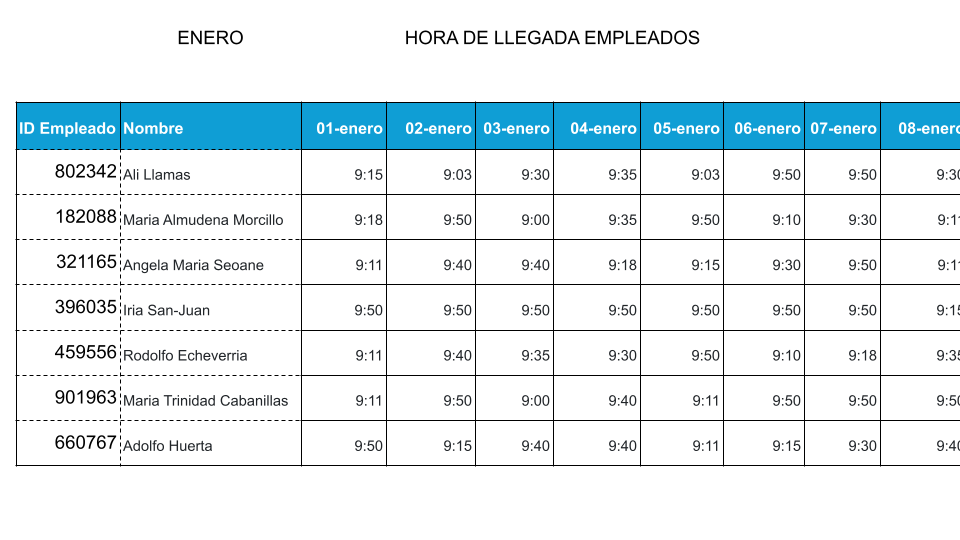


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Data sets for Practice/Lista_nomina.csv", header=None)


# Encabezados

headers = df.iloc[[2]]
columnas_lista = headers.T.values.tolist()
encabezados_simplificados = [elemento[0] for elemento in columnas_lista]

# Ubicación de mi set de datos
df = df.iloc[3:9]

# Asignar el nombre de mis columnas
df.columns = encabezados_simplificados

df

,ID Empleado,Nombre,01/01/1900,02/01/1900,03/01/1900,04/01/1900,05/01/1900,06/01/1900,07/01/1900,08/01/1900,...,22/01/1900,23/01/1900,24/01/1900,25/01/1900,26/01/1900,27/01/1900,28/01/1900,29/01/1900,30/01/1900,31/01/1900
3,802342,Ali Llamas,09:15:00 a. m.,09:03:00 a. m.,09:30:00 a. m.,09:35:00 a. m.,09:03:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,09:30:00 a. m.,...,09:50:00 a. m.,09:40:00 a. m.,09:11:00 a. m.,09:50:00 a. m.,09:15:00 a. m.,09:30:00 a. m.,09:00:00 a. m.,09:15:00 a. m.,09:30:00 a. m.,09:30:00 a. m.
4,182088,Maria Almudena Morcillo,09:18:00 a. m.,09:50:00 a. m.,09:00:00 a. m.,09:35:00 a. m.,09:50:00 a. m.,09:10:00 a. m.,09:30:00 a. m.,09:11:00 a. m.,...,09:50:00 a. m.,09:40:00 a. m.,09:40:00 a. m.,09:03:00 a. m.,09:50:00 a. m.,09:40:00 a. m.,09:15:00 a. m.,09:11:00 a. m.,09:40:00 a. m.,09:40:00 a. m.
5,321165,Angela Maria Seoane,09:11:00 a. m.,09:40:00 a. m.,09:40:00 a. m.,09:18:00 a. m.,09:15:00 a. m.,09:30:00 a. m.,09:50:00 a. m.,09:11:00 a. m.,...,09:15:00 a. m.,09:18:00 a. m.,09:03:00 a. m.,09:11:00 a. m.,09:03:00 a. m.,09:11:00 a. m.,09:03:00 a. m.,09:40:00 a. m.,09:11:00 a. m.,09:11:00 a. m.
6,396035,Iria San-Juan,09:50:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,09:15:00 a. m.,...,09:50:00 a. m.,09:10:00 a. m.,09:40:00 a. m.,09:18:00 a. m.,09:11:00 a. m.,09:15:00 a. m.,09:40:00 a. m.,09:50:00 a. m.,09:15:00 a. m.,09:15:00 a. m.
7,459556,Rodolfo Echeverria,09:11:00 a. m.,09:40:00 a. m.,09:35:00 a. m.,09:30:00 a. m.,09:50:00 a. m.,09:10:00 a. m.,09:18:00 a. m.,09:35:00 a. m.,...,09:00:00 a. m.,09:11:00 a. m.,09:11:00 a. m.,09:11:00 a. m.,09:10:00 a. m.,09:03:00 a. m.,09:15:00 a. m.,09:15:00 a. m.,09:03:00 a. m.,09:03:00 a. m.
8,901963,Maria Trinidad Cabanillas,09:11:00 a. m.,09:50:00 a. m.,09:00:00 a. m.,09:40:00 a. m.,09:11:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,09:50:00 a. m.,...,09:11:00 a. m.,09:15:00 a. m.,09:50:00 a. m.,09:40:00 a. m.,09:03:00 a. m.,09:03:00 a. m.,09:35:00 a. m.,09:18:00 a. m.,09:03:00 a. m.,09:03:00 a. m.


In [27]:
# Realizar unpivoteo de columnas

tabla_melt = df.melt(id_vars=["ID Empleado", "Nombre"], var_name = "Fecha", value_name = "Hora")


,ID Empleado,Nombre,Fecha,Hora
0,802342,Ali Llamas,01/01/1900,09:15:00 a. m.
1,182088,Maria Almudena Morcillo,01/01/1900,09:18:00 a. m.
2,321165,Angela Maria Seoane,01/01/1900,09:11:00 a. m.
3,396035,Iria San-Juan,01/01/1900,09:50:00 a. m.
4,459556,Rodolfo Echeverria,01/01/1900,09:11:00 a. m.
...,...,...,...,...
181,182088,Maria Almudena Morcillo,31/01/1900,09:40:00 a. m.
182,321165,Angela Maria Seoane,31/01/1900,09:11:00 a. m.
183,396035,Iria San-Juan,31/01/1900,09:15:00 a. m.
184,459556,Rodolfo Echeverria,31/01/1900,09:03:00 a. m.


In [28]:
#Creacion de columnas de apoyo

tabla_melt["day"] = pd.DatetimeIndex(tabla_melt["Hora"]).day

tabla_melt["hour"] = pd.DatetimeIndex(tabla_melt["Hora"]).hour

tabla_melt["minute"] = pd.DatetimeIndex(tabla_melt["Hora"]).minute

# Creación de columna de fracciones de horas y de suma de horas

tabla_melt["Fracc_Horas"] = tabla_melt["minute"] / 60

tabla_melt["Suma_Horas"] = tabla_melt["Fracc_Horas"] + tabla_melt["hour"]

tabla_melt

,ID Empleado,Nombre,Fecha,Hora,day,hour,minute,Fracc_Horas,Suma_Horas
0,802342,Ali Llamas,01/01/1900,09:15:00 a. m.,8,9,15,0.250000,9.250000
1,182088,Maria Almudena Morcillo,01/01/1900,09:18:00 a. m.,8,9,18,0.300000,9.300000
2,321165,Angela Maria Seoane,01/01/1900,09:11:00 a. m.,8,9,11,0.183333,9.183333
3,396035,Iria San-Juan,01/01/1900,09:50:00 a. m.,8,9,50,0.833333,9.833333
4,459556,Rodolfo Echeverria,01/01/1900,09:11:00 a. m.,8,9,11,0.183333,9.183333
...,...,...,...,...,...,...,...,...,...
181,182088,Maria Almudena Morcillo,31/01/1900,09:40:00 a. m.,8,9,40,0.666667,9.666667
182,321165,Angela Maria Seoane,31/01/1900,09:11:00 a. m.,8,9,11,0.183333,9.183333
183,396035,Iria San-Juan,31/01/1900,09:15:00 a. m.,8,9,15,0.250000,9.250000
184,459556,Rodolfo Echeverria,31/01/1900,09:03:00 a. m.,8,9,3,0.050000,9.050000


In [29]:
# Agrupacion por empleado para la suma de horas

tabla_suma = tabla_melt.groupby(["Nombre"])[["Suma_Horas"]].sum()

tabla_suma


,Suma_Horas
Nombre,
Ali Llamas,291.266667
Angela Maria Seoane,290.916667
Iria San-Juan,295.600000
Maria Almudena Morcillo,294.133333
Maria Trinidad Cabanillas,291.183333
Rodolfo Echeverria,290.133333


In [30]:
# Creacion de fecha de validacion para retardos


dia = int(pd.DatetimeIndex(tabla_melt["Hora"]).day[0])
mes = int(pd.DatetimeIndex(tabla_melt["Hora"]).month[0])
año = int(pd.DatetimeIndex(tabla_melt["Hora"]).year[0])


tabla_melt["Fecha_Validacion"] = pd.Timestamp(day=dia,month=mes,year=año,hour=9,minute=15)

#Casteo de columnas

tabla_melt["Hora"] = pd.to_datetime(tabla_melt["Hora"])

# Realizar la misma funcion a traves de lambda

tabla_melt['Retardo'] = tabla_melt.apply(lambda x: 1 if x['Hora'] >= x['Fecha_Validacion'] else 0, axis=1)


# Agrupacion de retardos

agrupacion_retardos = tabla_melt.groupby(["Nombre"])[["Retardo"]].sum()

agrupacion_retardos_ord = agrupacion_retardos.sort_values(by="Retardo", ascending= False)

agrupacion_retardos_ord

<ipython-input-30-202cf2fa954c>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tabla_melt["Hora"] = pd.to_datetime(tabla_melt["Hora"])


,Retardo
Nombre,
Iria San-Juan,26
Ali Llamas,23
Maria Almudena Morcillo,21
Angela Maria Seoane,20
Maria Trinidad Cabanillas,16
Rodolfo Echeverria,15


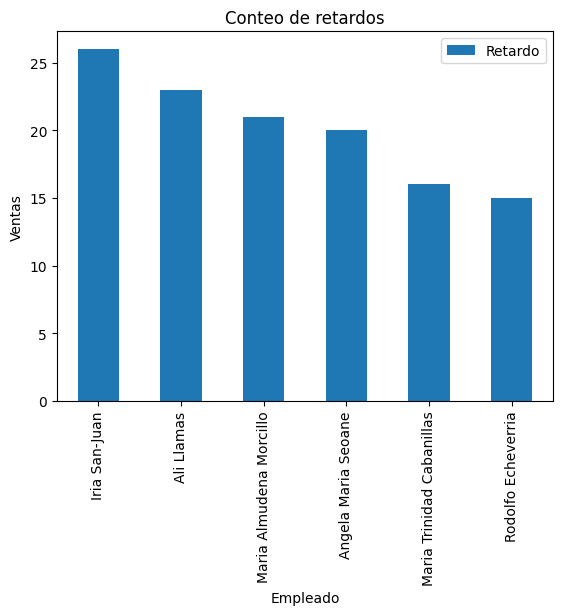

In [32]:
# Creacion de un gráfico de barras
agrupacion_retardos_ord.plot(kind='bar')
plt.title('Conteo de retardos')
plt.xlabel('Empleado')
plt.ylabel('Ventas')
plt.show()